# Import Libraries, Functions, and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/ENGG_680_Project/Database/

/content/drive/MyDrive/ENGG_680_Project/Database


In [3]:
!ls

'SS CFST Database_Finalised_for correlation.xlsx'  'SS CFST Database.xlsx'
'SS CFST Database_Finalised.xlsx'


In [4]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [5]:
#importing libraries and linear regression from scikit learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score


#Loading database
df = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx")
df_circ = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx", sheet_name=2)

# Rectangular CatBoost

In [20]:
# Define X (features) and y (target)
X = df.drop(columns=['N_Test'])
y = df['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 10)
(211,)


In [21]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize and train CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, random_seed=42, verbose=0)

catboost_model.fit(X_train, y_train)

In [23]:
# Predict on the test set
y_pred = catboost_model.predict(X_test)

In [24]:
# Calculating error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 74593.21326145298
R^2 Score: 0.942905628488367


In [25]:
# Get feature importances
feature_importances = catboost_model.get_feature_importance()

# Create a DataFrame to show feature importances alongside feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

  Feature  Importance
2       t   27.347065
1       H   18.015410
6   f_0.2   16.502553
0       B   14.202365
3       L    6.754589
5     E_o    4.861377
9      fc    4.307588
8       n    3.917866
7      fu    3.073383
4     L/B    1.017803


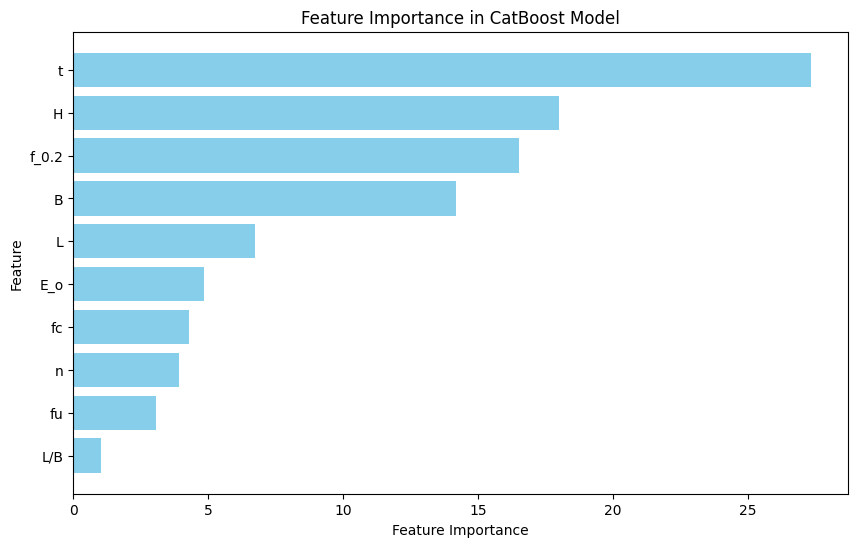

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in CatBoost Model")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

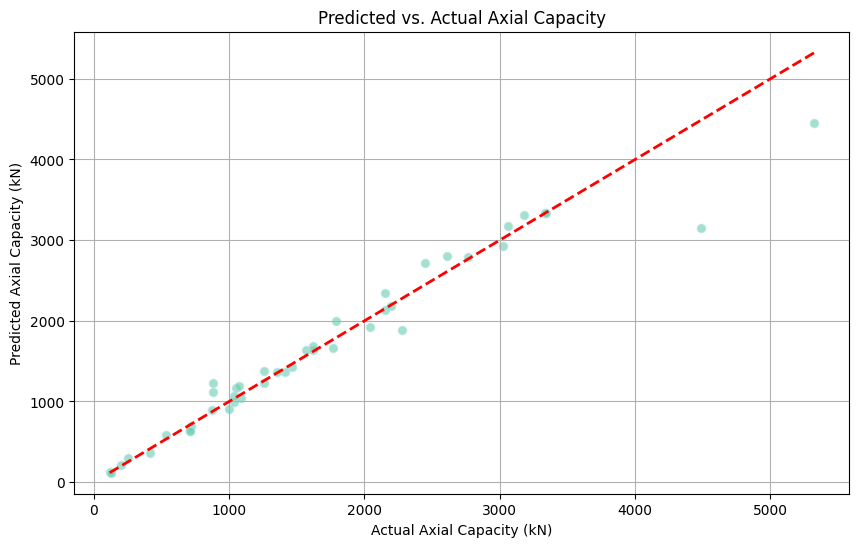

In [27]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.grid(True)
plt.show()

# Circular Catboost

In [28]:
# Define X (features) and y (target)
X = df_circ.drop(columns=['N_Test'])
y = df_circ['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 9)
(211,)


In [29]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize and train CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, random_seed=42, verbose=0)

catboost_model.fit(X_train, y_train)

In [31]:
# Predict on the test set
y_pred = catboost_model.predict(X_test)

In [32]:
# Calculating error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 41398.51695775435
R^2 Score: 0.9845804273719952


In [33]:
# Get feature importances
feature_importances = catboost_model.get_feature_importance()

# Create a DataFrame to show feature importances alongside feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

  Feature  Importance
2       L   42.033174
5    f0.2   16.251216
1       t   15.038264
0       D   14.297080
6      fu    7.624872
7       n    1.631651
3     L/D    1.459669
8     f'c    1.244871
4      Eo    0.419202


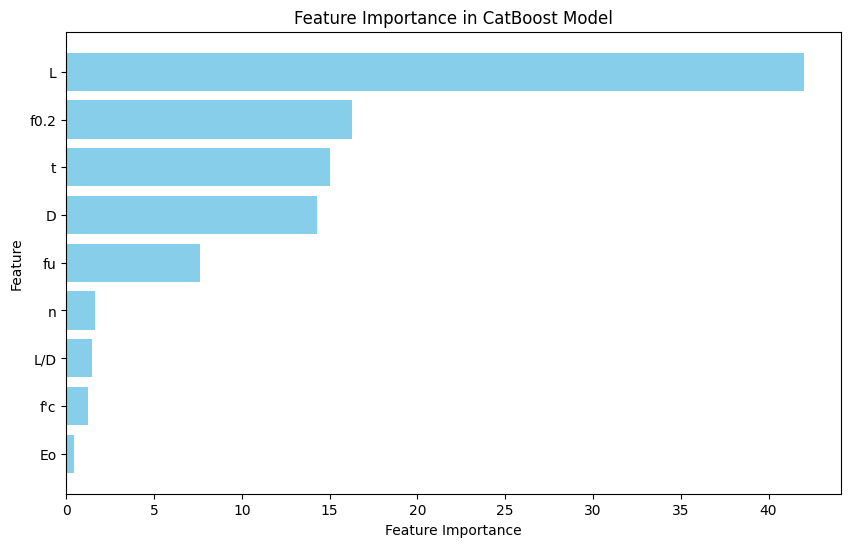

In [34]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in CatBoost Model")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

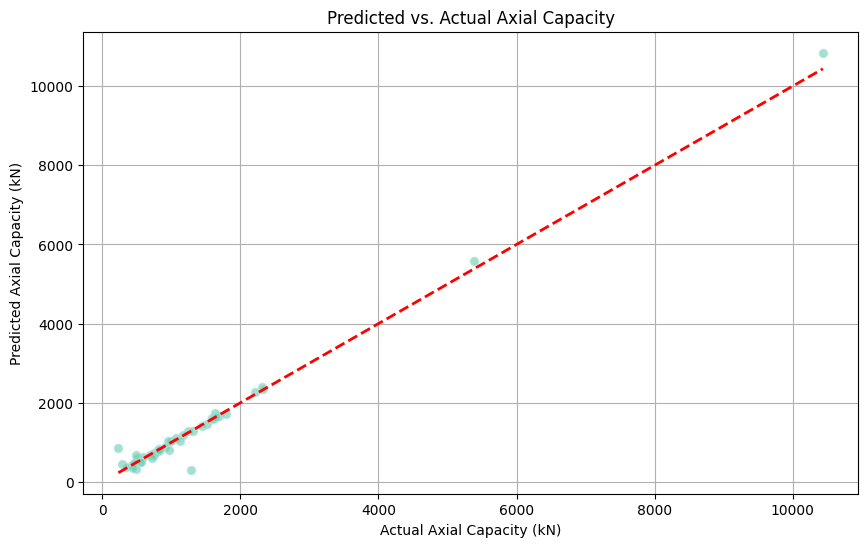

In [35]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.grid(True)
plt.show()